# Homework 2 - Part 2
This part, I work with the approved building permits data from DOB
1. Work in the ADRF. Fire off a Jupyter notebook with Jupyter Hub or Jupyter Lab for Mac and Linux and switch to the Kernel PUI2016_Python2 or PUI2016_Python3 from the Jupyter dropdown menu under Kernels -> Change Kernel.
The below cell shows all the packages I imported and need to use. 

In [262]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

## PUIdata folder testing
2.Check that an environmental variable PUIDATA exists and that it points to the PUIdata directory. Forcefully set it up within the notebook if it is not.Follow the instructions in this notebok. The CSV file must have at least 2 numerical value columns.

In [263]:
puidata=os.getenv("PUIDATA")
puidata

'/nfshome/sz2404/PUIdata'

In [264]:
print ("puidata:", os.getenv("PUIDATA"))

puidata: /nfshome/sz2404/PUIdata


## DSNY Tonnage Data
In this step, importing data from NYC Open Data and read it. 
Here is the link to Tonnage Data: https://data.cityofnewyork.us/City-Government/DSNY-Monthly-Tonnage-Data/ebb7-mvp5/data

In [299]:
#dobdata=pd.read_csv(puidata + '/DCAS_Managed_Building_Fuel_Usage.csv')
#dobdata
#tonurl="https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD"
Tonnage=pd.read_csv(puidata + '/DSNY_Monthly_Tonnage_Data.csv')

#### Display the Top 7 rows in this table
3.Display the top 7 rows of the DF in your notebook. This table must be rendered.

In [300]:
Tonnage.head(7)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,2017 / 08,Manhattan,7,4754.7,997.3,720.0,19.4,NaN,NaN,NaN,1
1,2017 / 08,Manhattan,12,4996.5,494.5,530.3,NaN,NaN,NaN,NaN,1
2,2017 / 08,Queens,8,3805.1,461.0,412.8,NaN,NaN,NaN,NaN,4
3,2017 / 08,Brooklyn,18,5907.8,584.1,599.3,NaN,NaN,NaN,NaN,3
4,2017 / 08,Queens,5,4827.9,597.6,758.9,185.3,NaN,NaN,NaN,4
5,2017 / 08,Bronx,9,4003.6,215.7,335.8,NaN,NaN,NaN,NaN,2
6,2017 / 08,Brooklyn,2,2448.5,544.3,360.0,53.5,NaN,NaN,NaN,3


4.Remove all but 2 numerical values columns of your choice (you can use the drop method of the dataframe, like in the lab example.)

In [301]:
Tonnage.columns

Index(['MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'REFUSETONSCOLLECTED',
       'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED', 'RESORGANICSTONS',
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS', 'BOROUGH_ID'],
      dtype='object')

I use the drop function to eliminate other columns and only leave two here for further plotting. I chose to keep tree_dbh(diametre of the tree measured at breast height) and borocode (the numerical code representing one of the five boroughs where the tree is standing). 

In [302]:
TonnageR=Tonnage.drop(['MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'MGPTONSCOLLECTED', 'RESORGANICSTONS',
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS', 'BOROUGH_ID'], axis=1)

5.Display the reducted dataframe. This table must be rendered.

In [303]:
TonnageR.head(10)

,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED
0,4754.7,997.3
1,4996.5,494.5
2,3805.1,461.0
3,5907.8,584.1
4,4827.9,597.6
5,4003.6,215.7
6,2448.5,544.3
7,5168.9,365.9
8,3165.5,521.0
9,2118.4,115.2


6.Plot the columns one against the other in a scatter plot using the datafraome plot method, like in the lab example. (usual rules for plotting apply, see Grading Guidelines and the instruction notebooks for HW1 Extra Credit, part 3, for more detailed hints on how to display your rendered plots, and the Lab3 and Class notebooks examples on how to use the dataframe plot modules. The plot must be rendered.

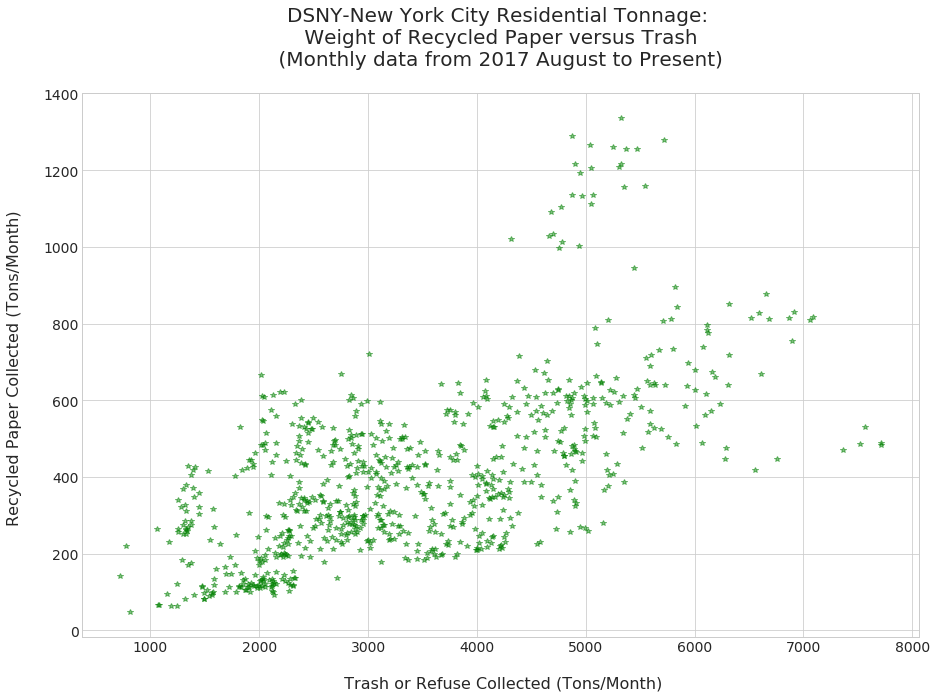

In [304]:
X=TonnageR['REFUSETONSCOLLECTED']
Y=TonnageR['PAPERTONSCOLLECTED']
plt.plot(X, Y, '*', c='g', alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.locator_params(axis='X', numticks=15)https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD
#plt.locator_params(axis="Y", numticks=15)
plt.xlabel("\n Trash or Refuse Collected (Tons/Month)", fontsize=16, position=(0.5,1))
plt.ylabel("Recycled Paper Collected (Tons/Month) \n", fontsize=16, position=(-0.5,0.5))
plt.title("DSNY-New York City Residential Tonnage: \n Weight of Recycled Paper versus Trash \n (Monthly data from 2017 August to Present) \n", fontsize=20)
plt.rcParams["figure.figsize"] = [20,10]
plt.show()

# Homework 2 - Extra Credit
### Work with and APIs and dates in Pandas

Working with extracting data from JSON file. 

In [305]:
tonlink="https://data.cityofnewyork.us/resource/8bkb-pvci.json"
Tonjson=pd.read_json(tonlink)

Display the top 8 rows.

In [306]:
Tonjson.head(8)

,borough,borough_id,communitydistrict,leavesorganictons,mgptonscollected,month,papertonscollected,refusetonscollected,resorganicstons,schoolorganictons,xmastreetons
0,Queens,4,4,5.07,394.00,2017 / 11,349.78,3997.15,NaN,NaN,NaN
1,Queens,4,11,NaN,396.53,2017 / 10,483.03,2691.88,236.41,NaN,NaN
2,Queens,4,7,NaN,694.62,2017 / 08,808.68,7058.92,NaN,NaN,NaN
3,Bronx,2,1,NaN,131.22,2017 / 09,105.14,1870.63,NaN,NaN,NaN
4,Queens,4,6,NaN,367.11,2018 / 08,438.97,2951.58,NaN,NaN,NaN
5,Brooklyn,3,9,NaN,214.42,2018 / 07,235.52,2996.15,NaN,NaN,NaN
6,Manhattan,1,12,NaN,499.46,2017 / 12,494.35,4748.06,NaN,39.07,NaN
7,Staten Island,5,3,NaN,757.62,2018 / 08,796.56,6118.22,NaN,NaN,NaN


Ploting Month&Year vs volume data of Recycled Paper collected from each community on a monthly basis.  

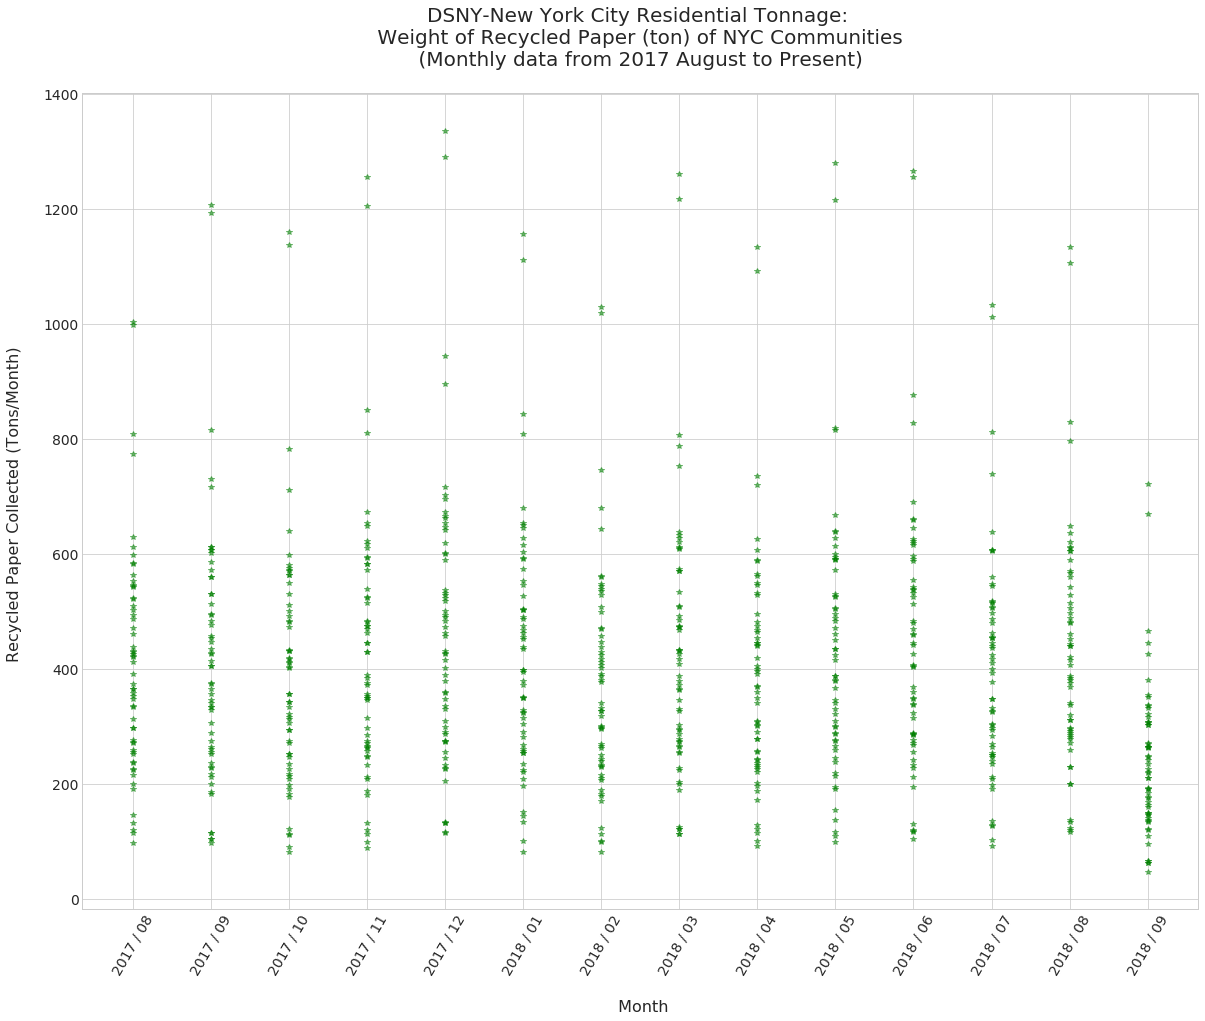

In [316]:
X1=Tonnage['MONTH']
Y1=Tonnage['PAPERTONSCOLLECTED']
plt.plot(X1, Y1, '*', c='g', alpha=0.5)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14)
#plt.locator_params(axis='X', numticks=15)https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD
#plt.locator_params(axis="Y", numticks=15)
plt.xlabel("\n Month", fontsize=16, position=(0.5,10))
plt.ylabel("Recycled Paper Collected (Tons/Month) \n", fontsize=16, position=(-0.5,0.5))
plt.title("DSNY-New York City Residential Tonnage: \n Weight of Recycled Paper (ton) of NYC Communities \n (Monthly data from 2017 August to Present) \n", fontsize=20)
plt.rcParams["figure.figsize"] = [15,10]
plt.show()

To practice with another dataset. I am ploting date vs morning turbidity of watershed. 

In [308]:
water="https://data.cityofnewyork.us/api/views/y43c-5n92/rows.csv?accessType=DOWNLOAD"
Waterd=pd.read_csv(water)

Display the top 7 rows. 

In [309]:
Waterd.head(7)

,Site,Date,Turbidity(NTU) at 12AM,Turbidity(NTU) at 4AM,Turbidity(NTU) at 8AM,Turbidity(NTU) at 12PM,Turbidity(NTU) at 4PM,Turbidity(NTU) at 8PM,Average 24hrTurbidity(NTU),"Coliform, Fecal(fc/100mL)"
0,DEL18DT,05/10/2015,NaN,1.0,0.95,0.95,1.00,1.00,0.98,<1
1,DEL18DT,05/11/2015,1.0,1.1,0.95,1.00,1.10,1.10,1.04,<1
2,DEL18DT,05/12/2015,1.1,1.1,1.10,0.90,0.95,1.10,1.04,1
3,DEL18DT,05/13/2015,0.9,1.1,0.95,0.90,1.00,0.95,0.97,1
4,DEL18DT,05/14/2015,1.1,1.0,1.00,0.95,0.95,0.95,0.99,<1
5,DEL18DT,05/15/2015,1.0,1.0,1.00,0.90,0.95,1.00,0.98,<1
6,DEL18DT,05/16/2015,1.1,1.0,1.00,0.75,0.85,0.95,0.94,<1


Display all the columns. 

In [310]:
Waterd.columns

Index(['Site', 'Date', 'Turbidity(NTU) at 12AM', 'Turbidity(NTU) at 4AM',
       'Turbidity(NTU) at 8AM', 'Turbidity(NTU) at 12PM',
       'Turbidity(NTU) at 4PM', 'Turbidity(NTU) at 8PM',
       'Average 24hrTurbidity(NTU)', 'Coliform, Fecal(fc/100mL)'],
      dtype='object')

Select only 2 columns. 

In [311]:
Waterd_2c=Waterd[['Date','Turbidity(NTU) at 8AM']]

In [312]:
Waterd_2c.head()

,Date,Turbidity(NTU) at 8AM
0,05/10/2015,0.95
1,05/11/2015,0.95
2,05/12/2015,1.10
3,05/13/2015,0.95
4,05/14/2015,1.00


Plotting morning turbidity at selected sites against dates. 

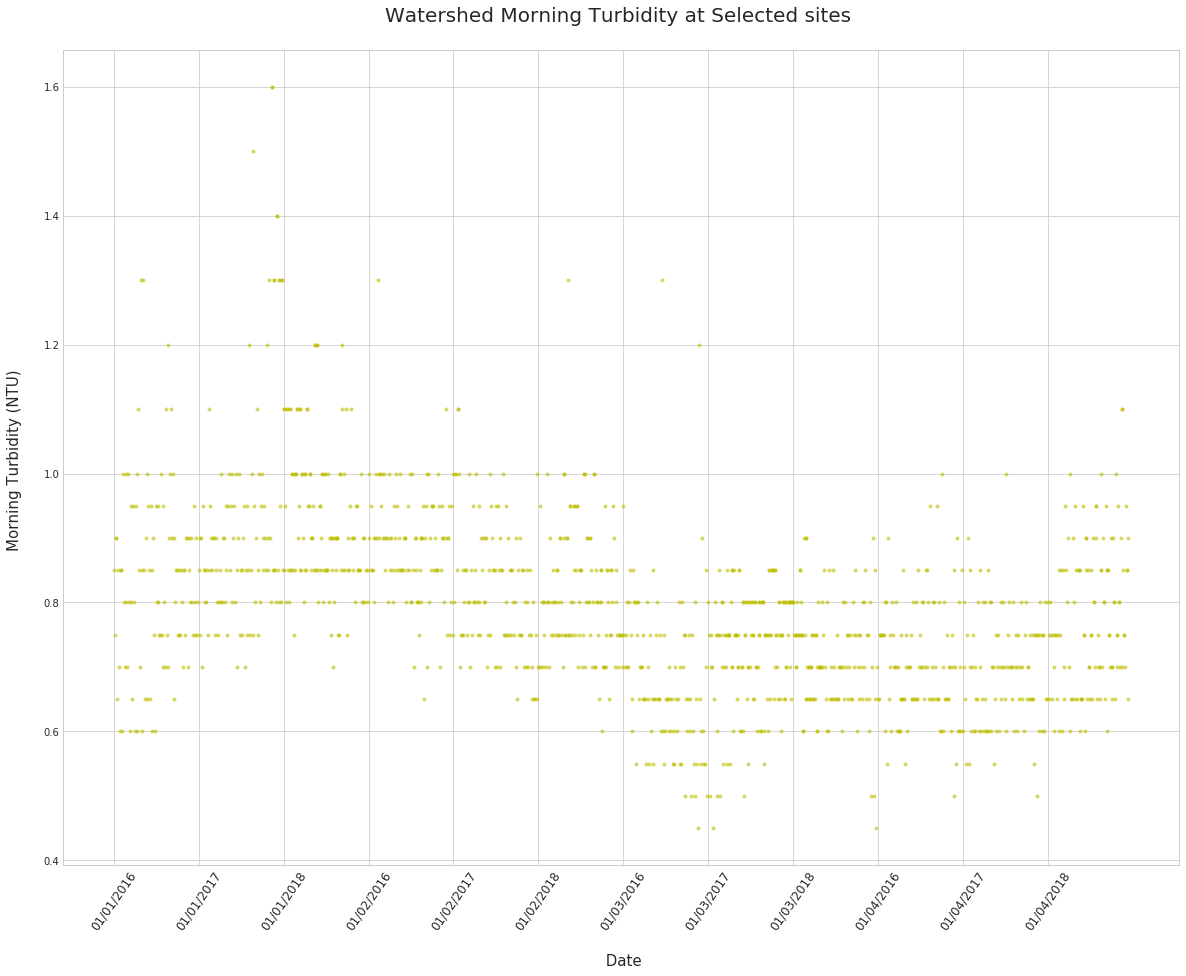

In [315]:
X2=Waterd['Date']
Y2=Waterd['Turbidity(NTU) at 8AM']
plt.plot(X2, Y2,"y.", alpha=0.5)
plt.xticks(rotation=55, fontsize=12)
plt.locator_params(nbins=12)
plt.xlabel("\n Date", fontsize=15)
plt.ylabel("Morning Turbidity (NTU) \n", fontsize=15)
plt.title("Watershed Morning Turbidity at Selected sites \n", fontsize=20)
plt.rcParams["figure.figsize"]=[20,15]
plt.show()
